In [3]:
from pmu_som import pmu_ctrl
from keithley2600 import Keithley2600


from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from j_measurement_FV_1 import j_measurement_FV_1
from j_measurement_FV_2 import j_measurement_FV_2

try:
    del(p.c)
except:
    pass
    
k = Keithley2600('GPIB0::17::INSTR', visa_library='')
p = pmu_ctrl.pmu()



# Call the function
error_1,offset_1 = j_measurement_FV_1(p,k)
error_2,offset_2 = j_measurement_FV_2(p,k)

#Display the error_1 DataFrame
print(error_1)
print(offset_1)
print(error_2)
print(offset_2)


0
0
      Error
0 -0.023124
1 -0.022154
2 -0.021004
3 -0.019794
4 -0.018394
5 -0.016964
6 -0.015704
7 -0.014484
8 -0.013194
9 -0.011916
32768
      Error
0 -0.023224
1 -0.013284
2 -0.012124
3 -0.010884
4 -0.009504
5 -0.008044
6 -0.006724
7 -0.005534
8 -0.004294
9 -0.002890
32742


0
0
Error 1 DataFrame:
      Error
0 -0.023124
1 -0.022154
2 -0.021024
3 -0.019764
4 -0.018454
5 -0.017014
6 -0.015694
7 -0.014514
8 -0.013184
9 -0.011878
Offset 1: 32768

Error 2 DataFrame:
      Error
0 -0.023124
1 -0.013244
2 -0.012084
3 -0.010804
4 -0.009534
5 -0.008124
6 -0.006804
7 -0.005574
8 -0.004284
9 -0.002918
Offset 2: 32742

Common Difference and Common Ratio:
Common Difference of Error 1: 0.0012495222222221357
Common Ratio of Error 1: 0.9288161723823767
Common Difference of Error 2: 0.0022450511111110245
Common Ratio of Error 2: 0.8022551051325897


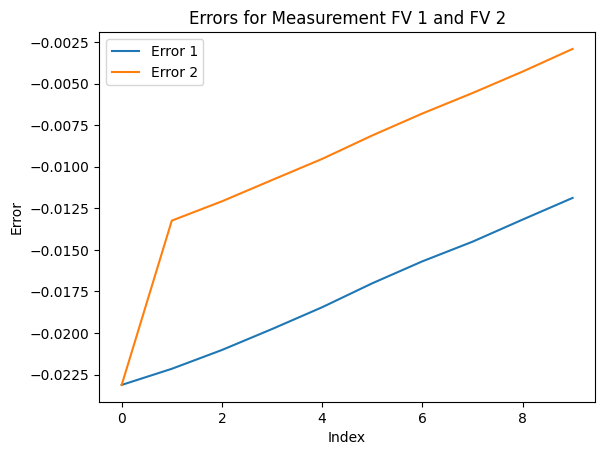

In [4]:
from pmu_som import pmu_ctrl
from keithley2600 import Keithley2600

from time import sleep
import numpy as np
import pandas as pd

from j_measurement_FV_1 import j_measurement_FV_1
from j_measurement_FV_2 import j_measurement_FV_2

def calculate_common_difference(series):
    differences = np.diff(series)
    common_difference = np.mean(differences)
    return common_difference

def calculate_common_ratio(series):
    ratios = series[1:] / series[:-1]
    common_ratio = np.mean(ratios)
    return common_ratio

try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
p = pmu_ctrl.pmu()

# Call the functions
error_1, offset_1 = j_measurement_FV_1(p, k)
error_2, offset_2 = j_measurement_FV_2(p, k)

# Calculate common difference and common ratio for error_1
error_1_values = error_1['Error'].values
common_diff_1 = calculate_common_difference(error_1_values)
common_ratio_1 = calculate_common_ratio(error_1_values)

# Calculate common difference and common ratio for error_2
error_2_values = error_2['Error'].values
common_diff_2 = calculate_common_difference(error_2_values)
common_ratio_2 = calculate_common_ratio(error_2_values)

# Display the results
print("Error 1 DataFrame:")
print(error_1)
print("Offset 1:", offset_1)

print("\nError 2 DataFrame:")
print(error_2)
print("Offset 2:", offset_2)

print("\nCommon Difference and Common Ratio:")
print(f"Common Difference of Error 1: {common_diff_1}")
print(f"Common Ratio of Error 1: {common_ratio_1}")
print(f"Common Difference of Error 2: {common_diff_2}")
print(f"Common Ratio of Error 2: {common_ratio_2}")

# Optionally, you can plot the results to visualize the errors
plt.figure()
plt.plot(error_1.index, error_1_values, label='Error 1')
plt.plot(error_2.index, error_2_values, label='Error 2')
plt.xlabel("Index")
plt.ylabel("Error")
plt.title("Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()


0
0
Error 1 DataFrame:
      Error  Percentage Change
0 -0.023224           0.000000
1 -0.022184          -4.478183
2 -0.021044          -5.138907
3 -0.019784          -5.987538
4 -0.018454          -6.722704
5 -0.016984          -7.965880
6 -0.015694          -7.595515
7 -0.014474          -7.773817
8 -0.013224          -8.636351
9 -0.011902          -9.996441
Offset 1: 32768

Error 2 DataFrame:
      Error  Percentage Change
0 -0.023224           0.000000
1 -0.013274         -42.844152
2 -0.012074          -9.040429
3 -0.010884          -9.856129
4 -0.009554         -12.220102
5 -0.008094         -15.282028
6 -0.006774         -16.308969
7 -0.005554         -18.010820
8 -0.004284         -22.867613
9 -0.002871         -32.988958
Offset 2: 32742

Common Difference and Common Ratio:
Common Difference of Error 1: 0.0012579888888889737
Common Ratio of Error 1: 0.9285607378492967
Common Difference of Error 2: 0.002261461111111196
Common Ratio of Error 2: 0.8006453334969106


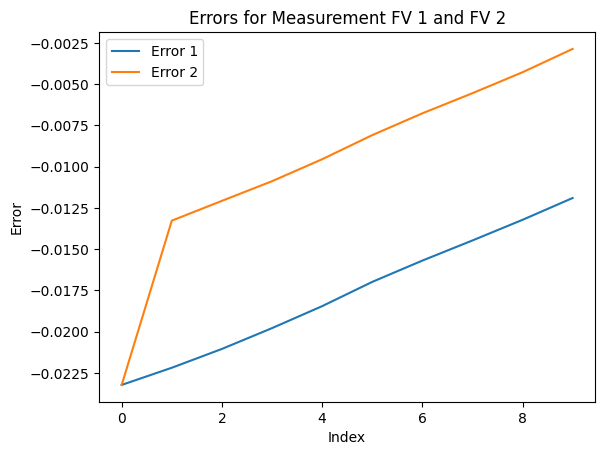

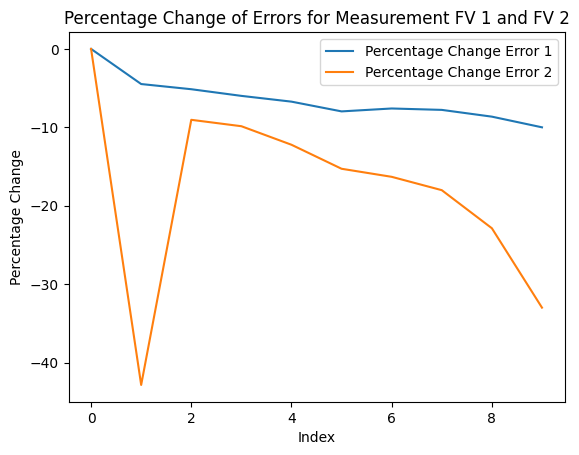

In [5]:
from pmu_som import pmu_ctrl
from keithley2600 import Keithley2600

from time import sleep
import numpy as np
import pandas as pd

from j_measurement_FV_1 import j_measurement_FV_1
from j_measurement_FV_2 import j_measurement_FV_2

def calculate_common_difference(series):
    differences = np.diff(series)
    common_difference = np.mean(differences)
    return common_difference

def calculate_common_ratio(series):
    ratios = series[1:] / series[:-1]
    common_ratio = np.mean(ratios)
    return common_ratio

def calculate_percentage_change(series):
    percentage_changes = np.diff(series) / series[:-1] * 100
    return np.insert(percentage_changes, 0, 0)  # Insert 0 at the beginning as the first value has no previous value to compare

try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
p = pmu_ctrl.pmu()
#measure_points = np.linspace(0, 0x8000, 10)

# Call the functions
error_1, offset_1 = j_measurement_FV_1(p, k)
error_2, offset_2 = j_measurement_FV_2(p, k)

# Calculate common difference and common ratio for error_1
error_1_values = error_1['Error'].values
common_diff_1 = calculate_common_difference(error_1_values)
common_ratio_1 = calculate_common_ratio(error_1_values)
percentage_change_1 = calculate_percentage_change(error_1_values)

# Calculate common difference and common ratio for error_2
error_2_values = error_2['Error'].values
common_diff_2 = calculate_common_difference(error_2_values)
common_ratio_2 = calculate_common_ratio(error_2_values)
percentage_change_2 = calculate_percentage_change(error_2_values)

# Add percentage change to DataFrames
error_1['Percentage Change'] = percentage_change_1
error_2['Percentage Change'] = percentage_change_2

# Display the results
print("Error 1 DataFrame:")
print(error_1)
print("Offset 1:", offset_1)

print("\nError 2 DataFrame:")
print(error_2)
print("Offset 2:", offset_2)

print("\nCommon Difference and Common Ratio:")
print(f"Common Difference of Error 1: {common_diff_1}")
print(f"Common Ratio of Error 1: {common_ratio_1}")
print(f"Common Difference of Error 2: {common_diff_2}")
print(f"Common Ratio of Error 2: {common_ratio_2}")

# Optionally, you can plot the results to visualize the errors
plt.figure()
plt.plot(error_1.index, error_1_values, label='Error 1')
plt.plot(error_2.index, error_2_values, label='Error 2')
plt.xlabel("Index")
plt.ylabel("Error")
plt.title("Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()

# Plot percentage changes
plt.figure()
plt.plot(error_1.index, percentage_change_1, label='Percentage Change Error 1')
plt.plot(error_2.index, percentage_change_2, label='Percentage Change Error 2')
plt.xlabel("Index")
plt.ylabel("Percentage Change")
plt.title("Percentage Change of Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()


0
0
Error 1 DataFrame:
      Error  Percentage Change
0 -0.023124          -0.000000
1 -0.022114          -4.367812
2 -0.020914          -9.557292
3 -0.019764         -14.530543
4 -0.018434         -20.282216
5 -0.016944         -26.725820
6 -0.015724         -32.001791
7 -0.014534         -37.148025
8 -0.013204         -42.899698
9 -0.011897         -48.550176
Offset 1: 32768

Error 2 DataFrame:
      Error  Percentage Change
0 -0.023124          -0.000000
1 -0.013194         -42.942943
2 -0.012094         -47.699966
3 -0.010824         -53.192166
4 -0.009504         -58.900593
5 -0.008014         -65.344197
6 -0.006784         -70.663413
7 -0.005584         -75.852893
8 -0.004264         -81.561320
9 -0.002952         -87.235497
Offset 2: 32742

Common Difference and Common Ratio:
Common Difference of Error 1: 0.0012473999999999133
Common Ratio of Error 1: 0.9289766939661978
Common Difference of Error 2: 0.0022413422222221356
Common Ratio of Error 2: 0.803214755126811


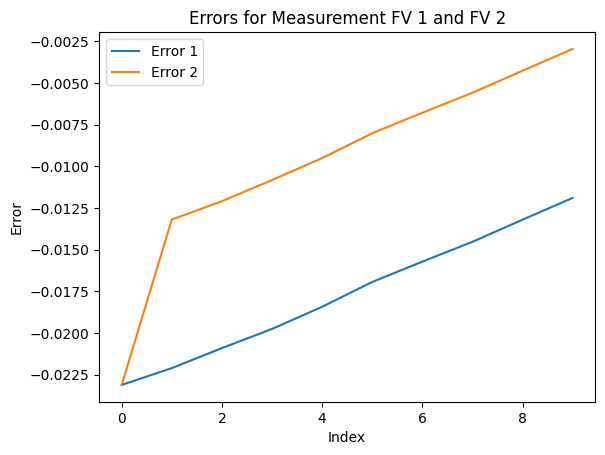

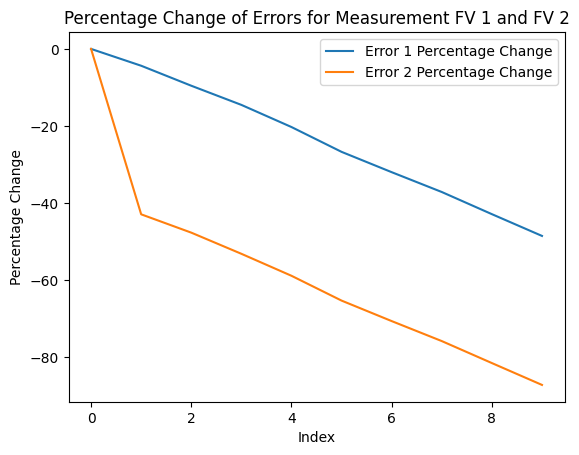

In [1]:
from pmu_som import pmu_ctrl
from keithley2600 import Keithley2600
from time import sleep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from j_measurement_FV_1 import j_measurement_FV_1
from j_measurement_FV_2 import j_measurement_FV_2

def calculate_common_difference(series):
    differences = np.diff(series)
    common_difference = np.mean(differences)
    return common_difference

def calculate_common_ratio(series):
    ratios = series[1:] / series[:-1]
    common_ratio = np.mean(ratios)
    return common_ratio

def calculate_percentage_change(series):
    first_value = series[0]
    percentage_change = ((series - first_value) / first_value) * 100
    return percentage_change

# Initialize instruments
k = Keithley2600('GPIB0::17::INSTR', visa_library='')
p = pmu_ctrl.pmu()

# Call the functions
error_1, offset_1 = j_measurement_FV_1(p, k)
error_2, offset_2 = j_measurement_FV_2(p, k)

# Calculate common difference and common ratio for error_1
error_1_values = error_1['Error'].values
common_diff_1 = calculate_common_difference(error_1_values)
common_ratio_1 = calculate_common_ratio(error_1_values)

# Calculate common difference and common ratio for error_2
error_2_values = error_2['Error'].values
common_diff_2 = calculate_common_difference(error_2_values)
common_ratio_2 = calculate_common_ratio(error_2_values)

# Calculate percentage change for error_1 and error_2
error_1['Percentage Change'] = calculate_percentage_change(error_1['Error'])
error_2['Percentage Change'] = calculate_percentage_change(error_2['Error'])

# Display the results
print("Error 1 DataFrame:")
print(error_1)
print("Offset 1:", offset_1)

print("\nError 2 DataFrame:")
print(error_2)
print("Offset 2:", offset_2)

print("\nCommon Difference and Common Ratio:")
print(f"Common Difference of Error 1: {common_diff_1}")
print(f"Common Ratio of Error 1: {common_ratio_1}")
print(f"Common Difference of Error 2: {common_diff_2}")
print(f"Common Ratio of Error 2: {common_ratio_2}")

# Plot the results to visualize the errors
plt.figure()
plt.plot(error_1.index, error_1_values, label='Error 1')
plt.plot(error_2.index, error_2_values, label='Error 2')
plt.xlabel("Index")
plt.ylabel("Error")
plt.title("Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()

# Plot percentage change for error_1 and error_2
plt.figure()
plt.plot(error_1.index, error_1['Percentage Change'], label='Error 1 Percentage Change')
plt.plot(error_2.index, error_2['Percentage Change'], label='Error 2 Percentage Change')
plt.xlabel("Index")
plt.ylabel("Percentage Change")
plt.title("Percentage Change of Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()


In [ ]:
from pmu_som import pmu_ctrl
from keithley2600 import Keithley2600
from pmu_som import pmu_ctrl, pmu_cal, pmu_calc, pmu_def
from time import sleep
from j_measurement_FV import j_measurement_FV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from percentage_calculator import calculate_percentage
from tqdm import tqdm



try:
    del(p.c)
except:
    pass

# Initialize instruments
k = Keithley2600('GPIB0::17::INSTR', visa_library='')
p = pmu_ctrl.pmu()






def calculate_common_difference(series):
    differences = np.diff(series)
    #common_difference = np.mean(differences)
    return differences

def calculate_common_ratio(series):
    ratios = series[1:] / series[:-1]
    #common_ratio = np.mean(ratios)
    return ratios

def calculate_percentage_change(series):
    first_value = series[0]
    percentage_change = ((series - first_value) / first_value) * 100
    return percentage_change

def calculate_percentage_change_single_value(value, first_value):
    percentage_change = ((value - first_value) / first_value) * 100
    return percentage_change


# Call the functions
error_1, offset_1 = j_measurement_FV(p, k)
sleep (0.5)

ch = 0
pmu_ch = p.channels[ch]
pmu_ch.write_dac(
     0x0000,
    dac_reg = "FIN_U"
    
)

sleep (0.5)
error_2, offset_2 = j_measurement_FV(p, k, 32742)

# Calculate common difference and common ratio for error_1
error_1_values = error_1['Error'].values
common_diff_1 = calculate_common_difference(error_1_values)
common_ratio_1 = calculate_common_ratio(error_1_values)

# Calculate common difference and common ratio for error_2
error_2_values = error_2['Error'].values
common_diff_2 = calculate_common_difference(error_2_values)
common_ratio_2 =calculate_common_ratio(error_2_values)

# Calculate percentage change for error_1 and error_2
error_1['Percentage Change'] = calculate_percentage_change(error_1['Error'])
error_2['Percentage Change'] = calculate_percentage_change(error_2['Error'])

# Calculate percentage change for offset values
offset_percentage_change = calculate_percentage_change_single_value(offset_2, offset_1)

# Display the results
print("Error 1 DataFrame:")
print(error_1)
print("Offset 1:", offset_1)

print("\nError 2 DataFrame:")
print(error_2)
print("Offset 2:", offset_2)

print("\nCommon Difference and Common Ratio:")
print(f"Common Difference of Error 1: {common_diff_1}")
print(f"Common Ratio of Error 1: {common_ratio_1}")
print(f"Common Difference of Error 2: {common_diff_2}")
print(f"Common Ratio of Error 2: {common_ratio_2}")

print("\nPercentage Change of Offset Values:")
print(f"Percentage Change from Offset 1 to Offset 2: {offset_percentage_change:.4f}%")

# Plot the results to visualize the errors
plt.figure()
plt.plot(error_1.index, error_1_values, label='Error 1')
plt.plot(error_2.index, error_2_values, label='Error 2')
plt.xlabel("Index")
plt.ylabel("Error")
plt.title("Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()

# Plot percentage change for error_1 and error_2
plt.figure()
plt.plot(error_1.index, error_1['Percentage Change'], label='Error 1 Percentage Change')
plt.plot(error_2.index, error_2['Percentage Change'], label='Error 2 Percentage Change')
plt.xlabel("Index")
plt.ylabel("Percentage Change")
plt.title("Percentage Change of Errors for Measurement FV 1 and FV 2")
plt.legend()
plt.show()


0
0.0
5.555640327899425
11.11128065579885
16.666920983698276
22.2225613115977
27.77820163949713
33.33384196739655
38.88948229529598
44.4451226231954
50.000762951094835
           CODE  VOUT - EXPECTED  VOUT-RESULT     Error
0      0.000000       -11.249924   -11.226500 -0.023424
1   3640.888889        -9.999924    -9.977480 -0.022444
2   7281.777778        -8.749924    -8.728680 -0.021244
3  10922.666667        -7.499924    -7.479990 -0.019934
4  14563.555556        -6.249924    -6.231360 -0.018564
5  18204.444444        -4.999924    -4.982890 -0.017034
6  21845.333333        -3.749924    -3.734190 -0.015734
7  25486.222222        -2.499924    -2.485470 -0.014454
8  29127.111111        -1.249924    -1.236800 -0.013124
9  32768.000000         0.000076     0.011869 -0.011792
0
0.0
5.555640327899425
11.11128065579885
16.666920983698276
22.2225613115977
27.77820163949713
33.33384196739655
